# Predictive Learning in Python

Steve Pittard wsp@emory.edu

# Preface

Predictive Modeling is a type of Machine Learning which itself is a sub branch of Artificial Intelligence. The [following graphic](https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/) provides us with some history of these domains. This is helpful if you are trying to orient yourself in the world of analytics and machine learning. Note that AI has been around for quite some time. The Wikipedia definition of AI is:

> The study of “intelligent agents”: any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals


<img src="pics/histofai.png" width ="660" height=660>

## Machine Learning

Machine Learning relies upon “patterns and inference”" to “perform a specific task without using explicit instructions”. It is a form of Applied AI that attempts to automatically learn from experience without being explicitly programmed. Think of Predictive Modeling as a subset of this which falls into two categories:

### Supervised

Algorithms that build a model on a set of data containing both the inputs and the desired outputs (“labels” or known numeric values). When you want to map input to known output labels. Build a model that, when applied to “new” data, will hopefully predict the correct label.

<img src="pics/super_class_regress.png" width ="660" height=660>

Some common techniques for Supervised learning include: Generalized Linear Models (GLM), Logistic Regression, Random Forests, Decision Trees, Neural Networks, Multivariate Adaptive Regression Splines (MARS), and K Nearest Neighbors.

### Unsupervised

Algorithms that take a set of data that contains only inputs, and find structure in the data (e.g. clustering of data points)

<img src="pics/unsupervised_class.png" width ="550" height=550>

Some common techniques for unsupervised learning include: hierarchical clustering, k-means clustering, mixture models, DBSCAN, Association Rules, Neural Networks

## Predictive Modeling

This lecture is concerned primarily with Predictive Modeling. Some examples of Predictive Modeling include:

- Predict current CD4 cell count of an HIV-positive patient using genome sequences

- Predict Success of Grant Applications

- Use attributes of chemical compounds to predict likelihood of hepatic injury

- How many copies of a new book will sell ?

- Will a customer change Internet Service Providers ?

In this domain there are generally two types of predictive models.


## In-Sample vs Out-Of-Sample Error

The goal of predictive model is to generate models that can generalize to new data. It would be good if any model we generate could provide a good estimate of out of sample error. It’s easy to generate a model on an entire data set (in sample data) and then turn around and use that data for prediction. But how will it perform on new data ? Haven’t we just over trained our model ?
1.4 Performance Metrics

For either case (regression vs classification) we need some type of metric or measure to let us know how well a given model will work on new or unseen data - also known as “out of sample” data. for Classification problems we look at things like “sensitivity”, “specificity”, “accuracy”, and “Area Under Curve”.

For Quantitative outcomes, we look at things like Root Mean Square Error (RMSE) or Mean Absolute Error (MAE). Here is the formula for Root Mean Square Error (RMSE). P represents a vector of predictions and O represents a vector of the observed (true) values.

$$ RMSE = \sqrt\frac{\sum_i^n(P_i-O_i)^2}{n} $$

## Black Box

The good news is that you can treat building predictive models as a “Black Box”. The bad news is that you can treat building predictive models as a “Black Box”.

<img src="pics/black_box.png" width ="650" height=650>




# Predictive / Supervised Learning

In Predictive Learning it is customary to apply methods to build models on existing data to help you

    Understand the data at hand and
    Build a model to predict outcomes on related information

Of course, number 2 assumes that what you already know in terms of the data and model is suitable for application to a more general situation when this might not be the case.

# Explanation Vs Prediction

Sometimes you just want to build a model (apply a method) to explain the data at hand as opposed to using it to predict outcomes for incoming data of a related nature. Not all models need to be predictive and in fact it might be useful to first get a basic understanding of the data before attempting to extend it to new information.

>  “A common misconception in various scientific fields is that predictive power can be inferred from explanatory power. However, the two are different and should be assessed separately.”

    — Gamit Shmueli - “To Explain or Predict”

Given a data set, there might be some variable therein that you would like to predict in terms of other variables. Ideally you would like to automate this process but not at the expense of understanding the underlying statistical considerations. The process should also be done in a way that allows one to define a specific performance measure / metric that can then be used to compare performance across a number of “models”.

Relative to explanatory work you wish to drill down into the data to better understand it and are less concerned about how any resulting model might apply to unseen or new data. In this case you might not look at other data sets or permutated versions of the data in which case you just build different models against the same data while trying out different features to arrive a the “best” model.

In predictive work, we typically use techniques such as cross fold validation and bootstrapping to provide us with different versions of the data to “train” a model after which we validate it on some “test” data that has been held out. So in this context, you will probably be looking at multiple versions of the original data set which adds to the overhead somewhat.

## Titanic Data

A good example of explanatory work is the often referred to “Titanic” data set that has lots of information on the passengers who traveled on the ill-fated Titanic ship. This data set is used in many Data Science type educational contexts to talk about building models. [Here](http://ghunt03.github.io/DAProjects/DAP02/TitanicDatasetInvestigation.html) is a notebook which explores the titanic data in greater depth. The following presents some basic visualizations

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/etitanic.csv"

titanic = pd.read_csv(url)

titanic.head()

,pclass,survived,sex,age,sibsp,parch
0,1st,1,female,29.0000,0,0
1,1st,1,male,0.9167,1,2
2,1st,0,female,2.0000,1,2
3,1st,0,male,30.0000,1,2
4,1st,0,female,25.0000,1,2


So then we look at different plots to become acquainted with the data. Here let’s see the survival counts by Gender:

sex       female  male
survived              
0             96   523
1            292   135
sex
female    0.752577
male      0.205167
Name: survived, dtype: float64


<AxesSubplot:xlabel='survived'>

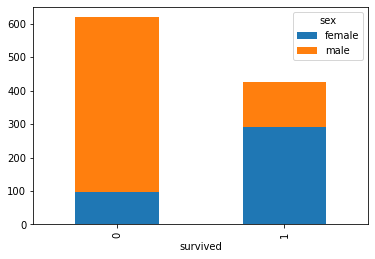

In [2]:
table = pd.crosstab(titanic['survived'],titanic['sex'])
print(table)

print(titanic.groupby('sex').survived.mean())

table.plot(kind='bar', stacked=True)

Next, we’ll see the survival rates by Passenger Class. If you saw the movie Titanic then you know what this will look like:

survived    0    1
pclass            
1st       103  181
2nd       146  115
3rd       370  131
pclass
1st    0.637324
2nd    0.440613
3rd    0.261477
Name: survived, dtype: float64


<AxesSubplot:xlabel='pclass'>

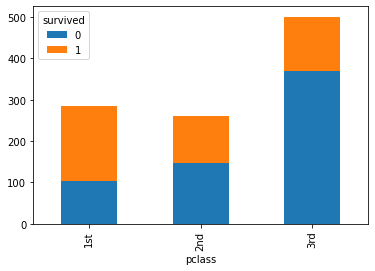

In [3]:
table = pd.crosstab(titanic['pclass'],titanic['survived'])
print(table)

print(titanic.groupby('pclass').survived.mean())

table.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Female')

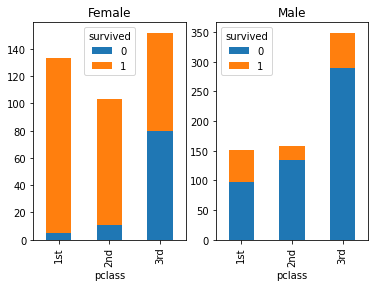

In [4]:
male   = titanic[titanic.sex=='male']
female = titanic[titanic.sex=='female']

#
mtable = pd.crosstab(male['pclass'],male['survived'])
ftable = pd.crosstab(female['pclass'],female['survived'])

#
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
mtable.plot(kind='bar', stacked=True,ax=axes[1])
axes[1].set_title("Male")
ftable.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title("Female")

We could even look at age distributions here. What patterns do you see here ? Did young children fare better than say someone who was 25-35 ?

Text(0.5, 1.0, 'Histogram of Passenger Age')

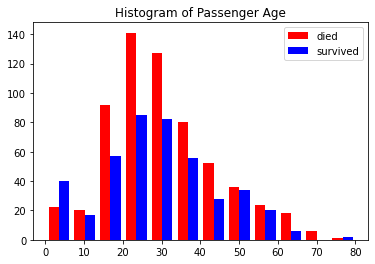

In [5]:
# See https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib

died = titanic[titanic.survived == 0]
survived = titanic[titanic.survived == 1]

plt.hist([died.age,survived.age],12,label=['died','survived'],color=['red','blue'])
plt.legend(loc="upper right")
plt.title("Histogram of Passenger Age")

Here were will look at the age histogram of survived vs died for each Passenger Class

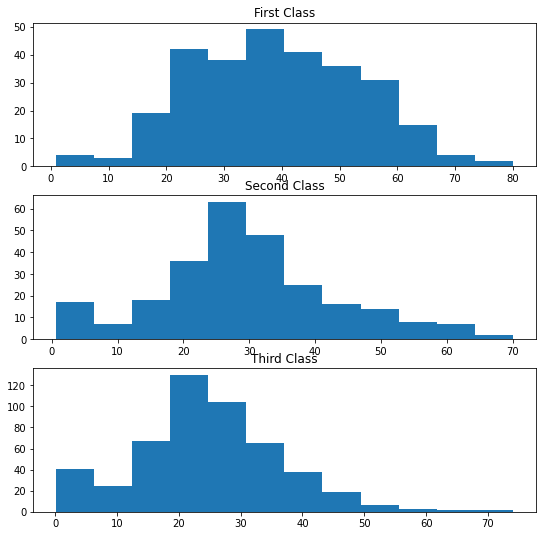

In [6]:
fig, axes = plt.subplots(3,1,figsize=(9,9))

pclass1 = titanic[titanic.pclass=="1st"]
pclass2 = titanic[titanic.pclass=="2nd"]
pclass3 = titanic[titanic.pclass=="3rd"]

axes[1].hist([pclass2.age],12,label=['died','survived'])
axes[1].set_title("Second Class")
axes[0].hist([pclass1.age],12,label=['died','survived'])
axes[0].set_title("First Class")
axes[2].hist([pclass3.age],12,label=['died','survived'])
axes[2].set_title("Third Class")

plt.show()

array([<AxesSubplot:title={'center':'1st'}>,
       <AxesSubplot:title={'center':'2nd'}>,
       <AxesSubplot:title={'center':'3rd'}>], dtype=object)

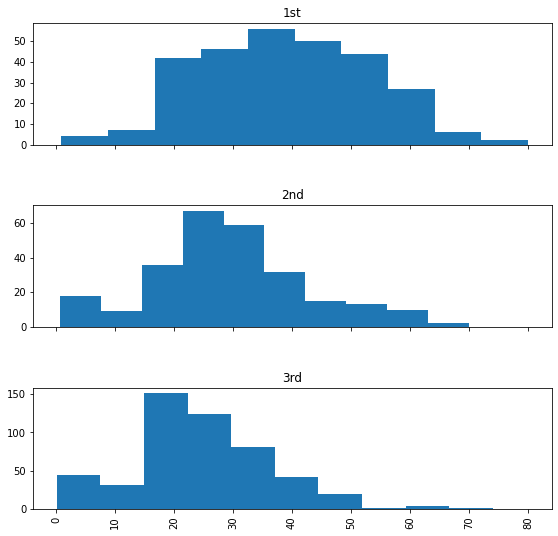

In [7]:
# We could replace the above with the following
titanic.hist(column='age',by='pclass',layout=(3,1),sharex=True, figsize=(9,9))

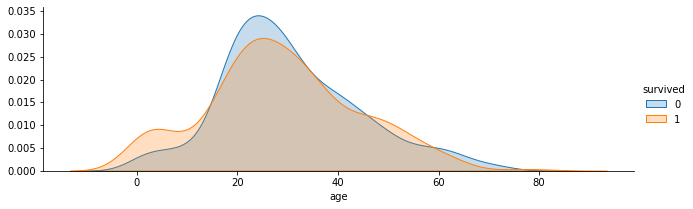

In [8]:
import seaborn as sns
as_fig = sns.FacetGrid(titanic,hue='survived',aspect=3)

as_fig.map(sns.kdeplot,'age',shade=True)
as_fig.add_legend()

# Bias Vs. Variance

See this [blog](https://thatdatatho.com/2018/08/08/explaining-bias-variance-trade-off-machine-learning/) for more information

## Bias

Think of the term bias as meaning deviation from the truth or reality. If a model fits some data very well then deviations from the actual values will be small which is what you might expect when applying the model to the very data used to produce it. You are able to explain the data but not then be able to use it to predict outcomes without experiencing large variance.

Any performance metric that is computed on the data “as is” will typically be somewhat optimistic in the context of predictive utility. The model you build on some data might fit the data very well (low bias) but then does not do very well when applied to a new data set wherein the model exhibits large variance. A model might not, on average, fit some existing data very well (high bias) but results in more predictable results (lower variance) when applied to new data.

## Variance

The concept of variance generally refers to a given algorithm’s sensitivity to unfamiliar or new data. An algorithm that has been well-trained, or even over trained, on a data set might exhibit low bias in that it “knows” or “hugs” the data very well. However, when given new data that might not be from the same distribution as the “training” data then large and/or unpredictable variance might result. If you flip this around a bit, an algorithm whose bias is high generally means that it deviates from the “truth” perhaps to a significant degree. Correspondingly, when the resulting model is applied to new or unseen data it will behave in a more predictable manner, generally resulting in lower variance. This isn’t always a bad thing. Maybe a more biased model is quick and easy to compute and it’s estimated performance (as determined by some metric such as RMSE) might be acceptable when applied to new data.

The general conclusion is that there is a trade off between Bias and Variance. The higher the bias, the lower the variance and the higher the variance, the lower the bias.

<img src="pics/targets.png" width ="500" height=500>

# Overfitting And Underfitting

If we overfit some data we then undermine our ability to apply it to new data in a way that results in good performance. This is the case where we have high model bias and resulting high variability when it is applied to new data. If you do “too good of a job” of learning some data then you might actually be unknowingly modeling inherent sources of error.


<img src="pics/overfitt.png" width ="500" height=500>

<img src="pics/overfit.png" width ="500" height=500>

If we underfit some data then consider that we haven’t “learned enough” from it to ensure low bias (deviations from reality). On the other hand if the model does a “good enough job” of describing the data then maybe it’s not a big deal especially since, when applied to new data, it doesn’t exhibit a high degree of variance.

Simpler models, such as linear regression, can be like this - easy to understand but somewhat biased in their assessment of data. Depending on the size of the data it might be computationally less expensive to build more biased models.

<img src="pics/underfit.png" width ="500" height=500>

Let's build two models using two different methods on some data. 
Which one of the models is more biased ?

In [56]:
# Read in some data
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"

# Setup some helpful tools
import pandas as pd
mtcars = pd.read_csv(url)

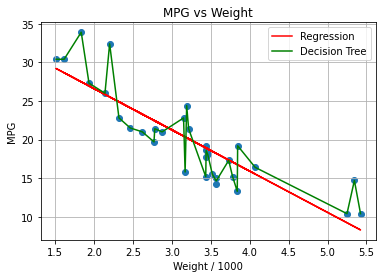

In [59]:
import matplotlib.pyplot as plt
plt.scatter(mtcars.wt, mtcars.mpg)
plt.title('MPG vs Weight')
plt.xlabel('Weight / 1000')
plt.ylabel('MPG')

# Build a Quick Regression Line

import numpy as np
m, b = np.polyfit(mtcars.wt, mtcars.mpg, 1)
plt.plot(mtcars.wt, m*mtcars.wt+b,color="red")

# Let's do a prediction with the Decision Tree

from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(mtcars.wt.values.reshape(-1,1),mtcars.mpg.values)

# Prediction Time

preds = tree_model.predict(mtcars.wt.values.reshape(-1,1))
#print(preds)

# Gotta sort the points (for whatever reason)

list=zip(*sorted(zip(*(mtcars.wt.values,preds))))
# Plot the predictions
plt.plot(*list,color="green")

plt.legend(["Regression", "Decision Tree"], loc ="upper right") 
plt.grid()
plt.show()


Based on the above graph, which model is more biased ? which one would exhbiit the most variance when applied to unseen data ? Models that are biased generally have less variability when applied to new data whereas less biased models generally have higher variability when applied to new data. Obviously, striking a balance between the two is desirable. There are techniques to help with this.

# Some Important Terminology

While we could start building a lot of other models at this point it would be wise to review some jargon in the world of predictive modeling so we can understand how to fully exploit the variables (also known as “features”) in our data. This is very important. Let’s start out with a basic example involving the most (over)used data set in R Education - the “mtcars” data frame. However, we've already read this information in above. Here is a more detailed description of the data. 

**Motor Trend Car Road Tests**

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile  design and performance for 32 automobiles (1973–74 models). A data frame with 32 observations on 11 (numeric) variables.

- mpg   Miles/(US) gallon
- cyl   Number of cylinders
- disp  Displacement (cu.in.)
- hp    Gross horsepower
- drat  Rear axle ratio
- wt    Weight (1000 lbs)
- qsec  1/4 mile time
- vs    Engine (0 = V-shaped, 1 = straight)
- am    Transmission (0 = automatic, 1 = manual)
- gear  Number of forward gears
- carb  Number of carburetors

We need to understand the variables in this data frame beyond the superficial. Let’s say that we wanted to predict the mpg for a given car using other variables in the data frame. We might also want to predict whether a car has an automatic or manual transmission based on some other variables. Some jargon would be useful here. For example, if we wanted to predict the mpg, consider the following graphic:

<img src="pics/jargon1.png" width ="650" height=650>

Or if we wanted to predict the transmission type - the jargon is the same but the variable type is different:

<img src="pics/jargon2.png" width ="650" height=650>

In the first case we are attempting to predict a numeric quantity whereas in the second case we are predicting a binary outcome (a 0 or 1) which corresponds to, respectively, an automatic or manual transmission. The fact that it appears to be numeric is a bit deceptive since it’s just a label - we wouldn’t compute on this number. So how do we get to know the data ? Plotting it might be one way but there are a couple of ways to get some clues up front using some code:

In [11]:
mtcars.head()

# Number of Unique Values in Each Column
mtcars.nunique()

mpg     25
cyl      3
disp    27
hp      22
drat    22
wt      29
qsec    30
vs       2
am       2
gear     3
carb     6
dtype: int64

Be on the lookout for columns that don’t have very many unique values such as vs, am, and cyl. These are more likely categories by which we might summarize the continuous quantities. As an example - what is the average mpg for each transmission type ?

What is the average mpg for all cylinder types ? Even though all the variables appear to be numeric doesn’t mean that they can be “computed” on. Does it make sense to take the average of the transmission type ? It’s either 0 or 1 (auto or manual). There is no such thing as a car with a 0.40625 transmission.

In [64]:
# Taking the mean of a category doesn't make sense
print("Mean of am is:",mtcars.am.mean())

# Better to count the number of observations in each category
print("Better to treat this as a category:",mtcars.am.value_counts())

# We can group by category and then take them mean of another column
print("Average MPG Mean for Transmission Type:", mtcars.groupby('am').mpg.mean())

Mean of am is: 0.40625
Better to treat this as a category: 0    19
1    13
Name: am, dtype: int64
Average MPG Mean for Transmission Type: am
0    17.147368
1    24.392308
Name: mpg, dtype: float64


# Levels Of Measurement

We should review the concepts behind the “levels of measurement” which are helpful in classifying the variables we have in this, or other, data frames. Here is a graphic which summarizes them. (Note: see [this video](https://www.youtube.com/watch?v=LPHYPXBK_ks) from which the graphics were taken).

<img src="pics/lom.png" width ="650" height=650>

## Nominal 


- The lowest level of measurement
- Discrete Categories
- No Order
- Binary
- Qualitative or Categorical

Examples include gender (assuming binary M/F), colors (“red”,“blue”,“pink”), marital status, religion, political affiliation (“republican”,“democrat”), smoker (“Y/N”), names

Possible measures for this type of information include Mode, Range, Percentage

## Ordinal


- Ordered Categories
- Relative Rankings
- Unknown Distance Between Rankings
- Zero Is Arbitrary

Examples include “first, second, third”, “low, middle, high”, Likert scales, size (small, medium,large), movie ratings, satisfaction ratings, pain ratings (1-10)

Possible measures include all those for nominal data with the addition of Median, Percentile, and Rank order or correlations. Can be counted but not measured granulalrly.

## Interval


- Ordered categories
- Equal distance between values
- Known and accepted unit of measurement
- Zero is arbitrary

The difference between two variables is on an interval. Fahrenheit or Celsius temp (0 does not represent and absolute lowest value). Interval scales tell us about order and differences. Elevation, time of day.

Measures include all those for Ordinal with the addition of mean, standard deviation, addition, and subtraction. However, multiplication and division wouldn’t make sense given that there is no absolute zero. Would a cylinder value of 0 make sense ?

## Ratio


- Equal Intervals
- Ordered
- Natural Zero

Examples include Weight, Height, Time (stopwatch) degrees Kelvin, blood pressure,

Can use all Interval tests, descriptive and inferential statistics, can make comparisons, add, subtract, multiply, divide.

<img src="pics/ops.png" width ="650" height=650>

Decision Tree for Levels of Measurement

<img src="pics/dt.png" width ="650" height=650>
